In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt
from scipy.stats import chi2

plt.rcParams.update({'font.size': 14})

scale_cuts_low = np.array([16.112, 11.904, 8.675, 7.251, 6.465, 6.023])
scale_cuts_high = 250

In [2]:
#load in shape resids
shape_dirs = ["/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/output_by_bin/shape_r/gammat_bf_rp",
              "/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/output_by_bin/shape_i/gammat_bf_rp",
              "/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/output_by_bin/shape_z/gammat_bf_rp"]
shape_resid = [[],[],[]]
for b in range(3):
    ang = []
    #iterate over lens and source bins
    for l in range(6):
        for s in range(1):
            asd = np.loadtxt(shape_dirs[b] + '/gammat_l{0}_s{1}.txt'.format(l+1, s+1))
            shape_resid[b].append(asd[:,1])
            ang.append(asd[:,0])
    shape_resid[b] = np.array(shape_resid[b])
    ang = np.array(ang)
    #print(shape_resid[b])
    #print(ang)

#and jackknife covariance
gammat_cov_dirs = ["/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/output_by_bin/shape_r/Jackknife/gammat_covariance",
                   "/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/output_by_bin/shape_i/Jackknife/gammat_covariance",
                   "/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/output_by_bin/shape_z/Jackknife/gammat_covariance"]
shape_gammat_err = [[],[],[]]
shape_invcov = [[],[],[]]
for b in range(3):
    #iterate over lens and source bins
    for l in range(6):
        for s in range(1):
            asd = np.loadtxt(gammat_cov_dirs[b] + '/cov_gammat_l{0}_s{1}.txt'.format(l+1, s+1))
            shape_gammat_err[b].append(np.sqrt(np.diag(asd)))
            shape_invcov[b].append(np.linalg.inv(asd))
    shape_gammat_err[b] = np.array(shape_gammat_err[b])
    shape_invcov[b] = np.array(shape_invcov[b])
    #print(gammat_err[b])
    
print(ang)
print(shape_invcov[0].shape)

[[  2.80504614   3.53134386   4.44569853   5.59680285   7.04595733
    8.87033473  11.1670898   14.05853313  17.69864461  22.28127345
   28.05046136  35.31343862  44.45698525  55.96802846  70.45957328
   88.70334731 111.67089804 140.5853313  176.9864461  222.81273453
  280.50461358 353.13438616 444.56985251 559.68028464 704.59573282
  887.03347308]
 [  2.80504614   3.53134386   4.44569853   5.59680285   7.04595733
    8.87033473  11.1670898   14.05853313  17.69864461  22.28127345
   28.05046136  35.31343862  44.45698525  55.96802846  70.45957328
   88.70334731 111.67089804 140.5853313  176.9864461  222.81273453
  280.50461358 353.13438616 444.56985251 559.68028464 704.59573282
  887.03347308]
 [  2.80504614   3.53134386   4.44569853   5.59680285   7.04595733
    8.87033473  11.1670898   14.05853313  17.69864461  22.28127345
   28.05046136  35.31343862  44.45698525  55.96802846  70.45957328
   88.70334731 111.67089804 140.5853313  176.9864461  222.81273453
  280.50461358 353.13438616 44

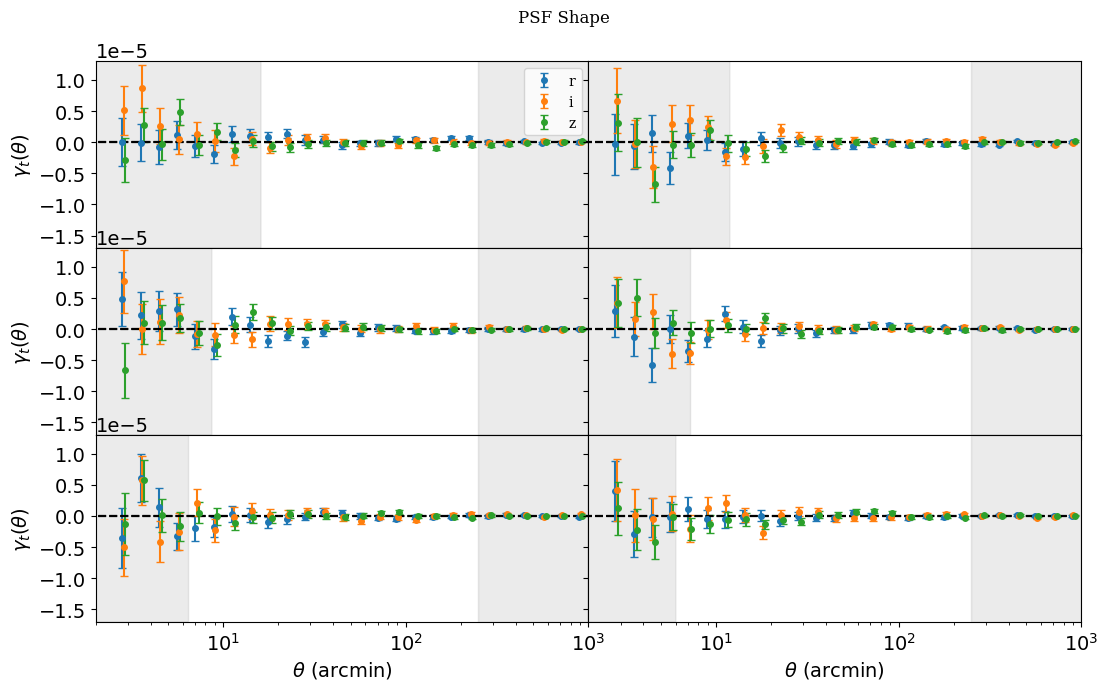

In [3]:
#plot resids
fig, ax = plt.subplots(3,2, figsize = (11, 7), sharex = True, sharey = True)
ccc = ['dodgerblue','darkorange', 'forestgreen', 'crimson']
plt.rcParams['font.size'] = 10  # Adjust font size
plt.rcParams['font.family'] = 'serif'  # Adjust font family

bands = ["r","i","z"]
zerox = [0,1000]
zeroy = [0,0]

for band in range(3):
    for t in range(6):
        for b in range(1):
            ttheta = shape_resid[band].reshape(6,1,26)[t][b]
            ttheta_err = shape_gammat_err[band].reshape(6,1,26)[t][b]
            ax[t//2, t%2].errorbar(ang.reshape(6,1,26)[t][b] + ang.reshape(6,1,26)[t][b]*0.02*band, ttheta, ttheta_err, 
                                label = bands[band], fmt='o', markersize = 4, capsize=3, capthick=1)

        ax[t//2, t%2].set_xscale('log')
        #ax[t//2, t%2].set_yscale('log')
        ax[t//2, t%2].set_ylim(-0.000017, 0.000013)
        ax[t//2, t%2].set_xlim(2, 1000)
        ax[2, t%2].set_xlabel(r'$\theta$ (arcmin)')
        ax[t//2, 0].set_ylabel(r'$\gamma_t(\theta)$')
        # ax[t//2, t%2].set_title('Lens bin {}'.format(t+1))
        #ax[t//2, t%2].set_yticks([])
        #ax[t//2, t%2].text(100, 0.003, 'Lens bin {}'.format(t+1), va='center', rotation='horizontal')
        ax[t//2, t%2].fill([0,0,scale_cuts_low[t],scale_cuts_low[t]],[-0.000017,  0.000013,-0.000017, 0.000013],  color='gray', alpha=0.05)
        ax[t//2, t%2].fill([scale_cuts_high,scale_cuts_high,1000,1000,],[0.000013,  -0.000017,-0.000017, 0.000013],  color='gray', alpha=0.05)
        ax[0,0].legend()

        ax[t//2, t%2].plot(zerox, zeroy, color="black", linestyle="--")
    
plt.suptitle('PSF Shape')
plt.tight_layout()
plt.subplots_adjust(hspace=0., wspace=0.)
plt.savefig("psf_shape_by_bin.pdf")

In [4]:
#calculate chi2
shape_chi2 = np.zeros([3,6,1])
shape_chi2_cuts = np.zeros([3,6,1])
shape_chi2_cuts_red = np.zeros([3,6,1])
for band in range(3):
    for t in range(6):
        for b in range(1):
            shape_chi2[band,t,b] = np.sum(shape_resid[band].reshape(6,1,26)[t][b]**2 / shape_gammat_err[band].reshape(6,1,26)[t][b]**2)
            gt_cuts = []
            gt_err_cuts = []
            for a in range(26):
                if scale_cuts_low[t] < ang.reshape(6,1,26)[t][b][a] < scale_cuts_high:
                    gt_cuts.append(shape_resid[band].reshape(6,1,26)[t][b][a])
                    gt_err_cuts.append(shape_gammat_err[band].reshape(6,1,26)[t][b][a])
            #print(len(gt_cuts))
            shape_chi2_cuts[band,t,b] = np.sum(np.array(gt_cuts)**2 / np.array(gt_err_cuts)**2)
            shape_chi2_cuts_red[band,t,b] = shape_chi2_cuts[band,t,b] / len(gt_cuts)
            
        
#print(chi2)
#print(shape_chi2_cuts[:,:,0])
#print(shape_chi2_cuts_red[:,:,0])

np.savetxt("/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/chi2/bybin_shape.txt", shape_chi2[:,:,0])
np.savetxt("/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/chi2/bybin_shape_cuts.txt", shape_chi2_cuts[:,:,0])
np.savetxt("/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/chi2/bybin_shape_cuts_red.txt", shape_chi2_cuts_red[:,:,0])

print(np.sum(shape_chi2_cuts[:,:,0]))
print(np.sum(shape_chi2[:,:,0]))

233.3440864900938
393.4465538134237


In [5]:
#load in size resids
size_dirs = ["/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/output_by_bin/size_r/gammat_bf_rp",
              "/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/output_by_bin/size_i/gammat_bf_rp",
              "/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/output_by_bin/size_z/gammat_bf_rp"]
size_resid = [[],[],[],[]]
for b in range(3):
    ang = []
    #iterate over lens and source bins
    for l in range(6):
        for s in range(1):
            asd = np.loadtxt(size_dirs[b] + '/gammat_l{0}_s{1}.txt'.format(l+1, s+1))
            size_resid[b].append(asd[:,1])
            ang.append(asd[:,0])
    size_resid[b] = np.array(size_resid[b])
    ang = np.array(ang)
    #print(shape_resid[b])
    #print(ang)

#and jackknife covariance
gammat_cov_dirs = ["/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/output_by_bin/size_r/Jackknife/gammat_covariance",
                   "/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/output_by_bin/size_i/Jackknife/gammat_covariance",
                   "/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/output_by_bin/size_z/Jackknife/gammat_covariance"]
size_gammat_err = [[],[],[],[]]
size_invcov = [[],[],[]]
for b in range(3):
    #iterate over lens and source bins
    for l in range(6):
        for s in range(1):
            asd = np.loadtxt(gammat_cov_dirs[b] + '/cov_gammat_l{0}_s{1}.txt'.format(l+1, s+1))
            size_gammat_err[b].append(np.sqrt(np.diag(asd)))
            size_invcov[b].append(np.linalg.inv(asd))
    size_gammat_err[b] = np.array(size_gammat_err[b])
    size_invcov[b] = np.array(size_invcov[b])
    #print(gammat_err[b])
    
#print(size_resid[3])
print(size_invcov[0].shape)

(6, 26, 26)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


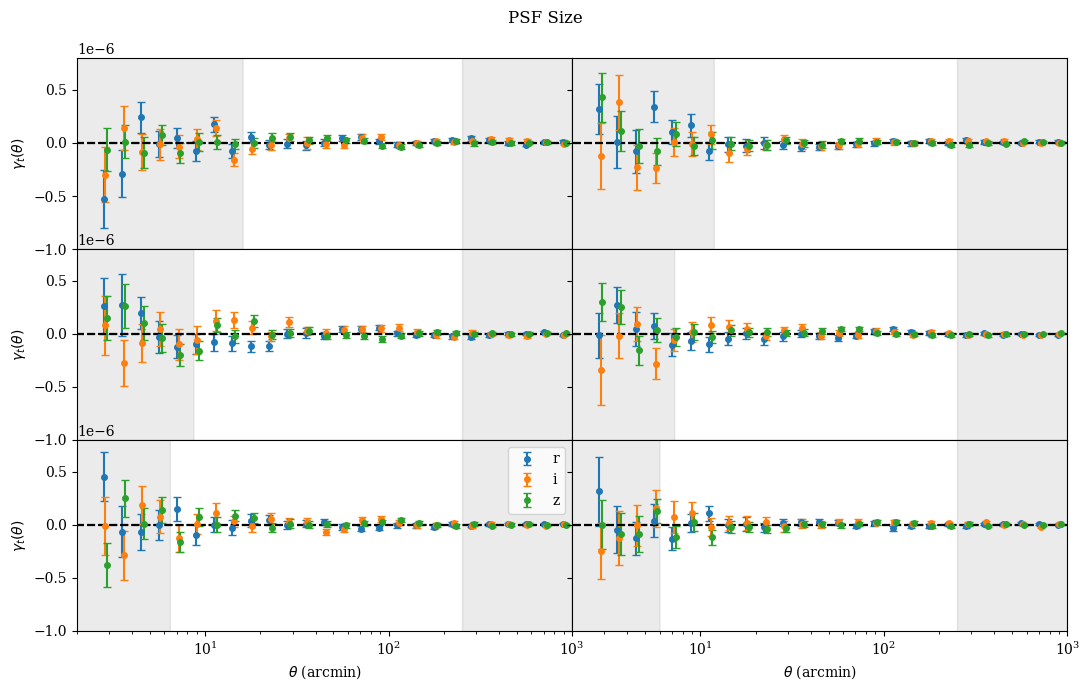

In [6]:
#plot resids
fig, ax = plt.subplots(3,2, figsize = (11, 7), sharex = True, sharey = True)
ccc = ['dodgerblue','darkorange', 'forestgreen', 'crimson']
plt.rcParams['font.size'] = 10  # Adjust font size
plt.rcParams['font.family'] = 'serif'  # Adjust font family

bands = ["r","i","z"]
zerox = [0,1000]
zeroy = [0,0]

for band in range(3):
    for t in range(6):
        for b in range(1):
            ttheta = size_resid[band].reshape(6,1,26)[t][b]
            ttheta_err = size_gammat_err[band].reshape(6,1,26)[t][b]
            ax[t//2, t%2].errorbar(ang.reshape(6,1,26)[t][b] + ang.reshape(6,1,26)[t][b]*0.02*band, ttheta, ttheta_err, 
                                label = bands[band], fmt='o', markersize = 4, capsize=3, capthick=1)

        ax[t//2, t%2].set_xscale('log')
        #ax[t//2, t%2].set_yscale('log')
        ax[t//2, t%2].set_ylim(-0.000001, 0.0000008)
        ax[t//2, t%2].set_xlim(2, 1000)
        ax[2, t%2].set_xlabel(r'$\theta$ (arcmin)')
        ax[t//2, 0].set_ylabel(r'$\gamma_t(\theta)$')
        # ax[t//2, t%2].set_title('Lens bin {}'.format(t+1))
        #ax[t//2, t%2].set_yticks([])
        #ax[t//2, t%2].text(100, 0.003, 'Lens bin {}'.format(t+1), va='center', rotation='horizontal')
        ax[t//2, t%2].fill([0,0,scale_cuts_low[t],scale_cuts_low[t]],[-0.00001,  0.00001,-0.00001, 0.00001],  color='gray', alpha=0.05)
        ax[t//2, t%2].fill([scale_cuts_high,scale_cuts_high,1000,1000,],[0.00001,  -0.00001,-0.00001, 0.00001],  color='gray', alpha=0.05)
        ax[2,0].legend()

        ax[t//2, t%2].plot(zerox, zeroy, color="black", linestyle="--")
    
plt.suptitle('PSF Size')
plt.tight_layout()
plt.subplots_adjust(hspace=0., wspace=0.)
plt.savefig("psf_size_by_bin.pdf", dpi=200)

In [7]:
#calculate chi2
size_chi2 = np.zeros([3,6,1])
size_chi2_cuts = np.zeros([3,6,1])
size_chi2_cuts_red = np.zeros([3,6,1])
for band in range(3):
    for t in range(6):
        for b in range(1):
            size_chi2[band,t,b] = np.sum(size_resid[band].reshape(6,1,26)[t][b]**2 / size_gammat_err[band].reshape(6,1,26)[t][b]**2)
            gt_cuts = []
            gt_err_cuts = []
            for a in range(26):
                if scale_cuts_low[t] < ang.reshape(6,1,26)[t][b][a] < scale_cuts_high:
                    gt_cuts.append(size_resid[band].reshape(6,1,26)[t][b][a])
                    gt_err_cuts.append(size_gammat_err[band].reshape(6,1,26)[t][b][a])
            #print(len(gt_cuts))
            size_chi2_cuts[band,t,b] = np.sum(np.array(gt_cuts)**2 / np.array(gt_err_cuts)**2)
            size_chi2_cuts_red[band,t,b] = size_chi2_cuts[band,t,b] / len(gt_cuts)
        
#print(chi2)
#print(size_chi2_cuts)
#print(size_chi2_cuts_red)

np.savetxt("/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/chi2/bybin_size.txt", size_chi2[:,:,0])
np.savetxt("/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/chi2/bybin_size_cuts.txt", size_chi2_cuts[:,:,0])
np.savetxt("/global/cfs/projectdirs/des/awhyley/ggl/psf_residuals_Oct24/chi2/bybin_size_cuts_red.txt", size_chi2_cuts_red[:,:,0])

print(np.sum(size_chi2[:,:,0]))

404.1668729222512


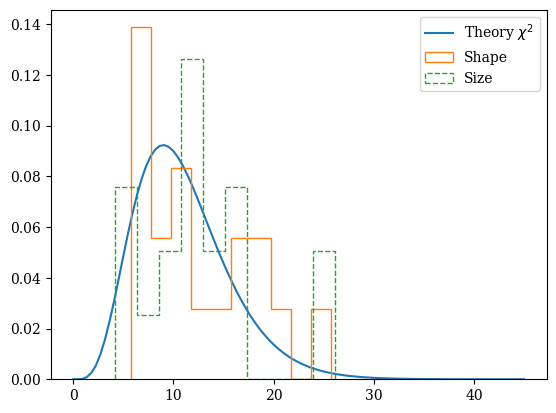

SHAPE
Full Range:
dof = 450, chi2 = 393.4465538134237
Scale Cuts:
dof = 243, chi2 = 233.3440864900938

SIZE
Full Range:
dof = 450, chi2 = 404.1668729222512
Scale Cuts:
dof = 243, chi2 = 230.55193999649606


In [8]:
#Chi2 distribution plot
x = np.linspace(0, 45, 100)
chi2_theory = chi2.pdf(x, 11)
plt.plot(x, chi2_theory)
plt.hist(shape_chi2_cuts.reshape(18), density=True, histtype="step")
plt.hist(size_chi2_cuts.reshape(18), density=True, histtype="step", linestyle="--")
plt.legend(["Theory $\chi^2$", "Shape", "Size"])
plt.show()

print("SHAPE")
print("Full Range:")
print("dof = 450, chi2 =",np.sum(shape_chi2))
print("Scale Cuts:")
print("dof = 243, chi2 =",np.sum(shape_chi2_cuts))
print()
print("SIZE")
print("Full Range:")
print("dof = 450, chi2 =",np.sum(size_chi2))
print("Scale Cuts:")
print("dof = 243, chi2 =",np.sum(size_chi2_cuts))

(3, 6)
Total degrees of freedom: 198
193.08547289963786
186.8794054653866


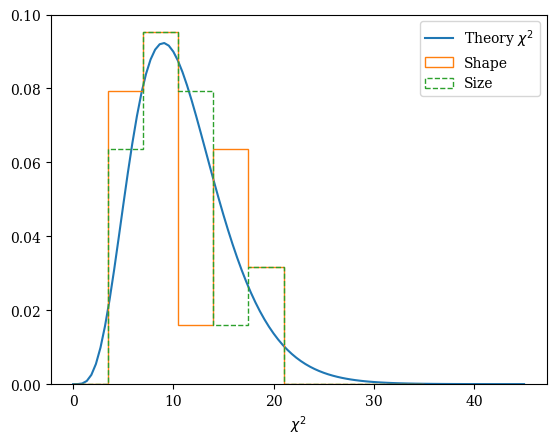

In [9]:
#Weighted chi2 plot for scale cuts
x = np.linspace(0, 45, 100)
nu = 11    #Number of data points in chi2 calculation minus 1
chi2_theory = chi2.pdf(x, nu)

weights = np.array([1/11, 1/12, 1/14, 1/14, 1/15, 1/15]) * nu    #Multiply chi2 by this so all values "have" nu dof
shape_chi2_cuts_w = np.zeros([3,6])
size_chi2_cuts_w = np.zeros([3,6])
print(shape_chi2_cuts_w.shape)
for band in range(3):
    shape_chi2_cuts_w[band] = shape_chi2_cuts.reshape([3,6])[band] * weights
    size_chi2_cuts_w[band] = size_chi2_cuts.reshape([3,6])[band] * weights

#print(shape_chi2_cuts)
#print(shape_chi2_cuts_w)

plt.plot(x, chi2_theory)
plt.hist(shape_chi2_cuts_w.reshape(18), density=True, histtype="step", bins=10, range=(0,35))
plt.hist(size_chi2_cuts_w.reshape(18), density=True, histtype="step", linestyle="--", bins=10, range=(0,35))
plt.legend(["Theory $\chi^2$", "Shape", "Size"])
plt.xlabel("$\chi^2$")
plt.savefig("psf_resid_dist_weighted.pdf", dpi=200)

print("Total degrees of freedom:", 198)
print(np.sum(shape_chi2_cuts_w.reshape(18)))
print(np.sum(size_chi2_cuts_w.reshape(18)))

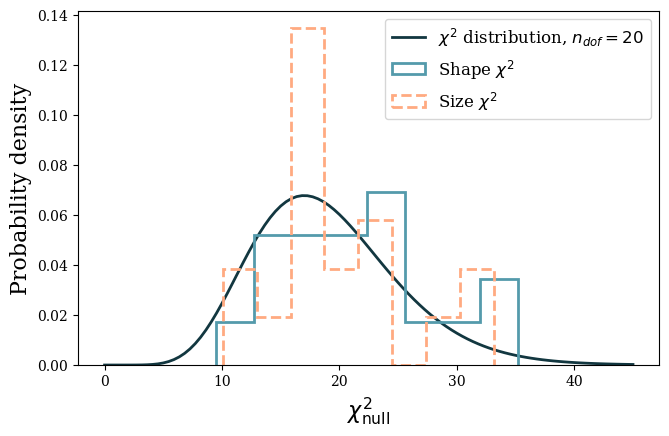

Total degrees of freedom: 342
390.2585615543656
367.91260658943884


In [12]:
#Chi2 with only large scales removed - Paper Plot

colors = ["#123740", "#549AAB", "#FFAA81", "#FF5E14"]

shape_chi2_nolarge = np.zeros([3,6,1])
size_chi2_nolarge = np.zeros([3,6,1])
for band in range(3):
    for t in range(6):
        for b in range(1):
            shape_chi2_nolarge[band,t,b] = shape_resid[band].reshape(6,1,26)[t][b][:20] @ shape_invcov[band][t][:20,:20] @ shape_resid[band].reshape(6,1,26)[t][b][:20].transpose()
            size_chi2_nolarge[band,t,b] = size_resid[band].reshape(6,1,26)[t][b][:20] @ size_invcov[band][t][:20,:20] @ size_resid[band].reshape(6,1,26)[t][b][:20].transpose()
            #print(shape_chi2_nolarge[band,t,b])
        
x = np.linspace(0, 45, 100)
chi2_theory = chi2.pdf(x, 19)
plt.figure(figsize=(7.5,4.6))
plt.plot(x, chi2_theory, color=colors[0], linewidth=2)
plt.hist(shape_chi2_nolarge.reshape(18), density=True, histtype="step", bins=8, color=colors[1], linewidth=2)
plt.hist(size_chi2_nolarge.reshape(18), density=True, histtype="step", linestyle="--", bins=8, color = colors[2], linewidth=2)
plt.xlabel(r"$\chi^2_{\text{null}}$", fontsize=16)
plt.ylabel("Probability density", fontsize=16)
plt.legend(["$\chi^2$ distribution, $n_{dof}=20$", "Shape $\chi^2$", "Size $\chi^2$"], fontsize=12)
plt.savefig("psf_chi2_250only.pdf", dpi=200, bbox_inches="tight")
plt.show()

print("Total degrees of freedom:", 342)
print(np.sum(shape_chi2_nolarge.reshape(18)))
print(np.sum(size_chi2_nolarge.reshape(18)))